# `pydaddy` with vector data

(This notebook assumes that you have gone through the [Getting Started](./1%20-%20Getting%20Started.ipynb) notebook.)

`pydaddy` also works with (2-dimensional) vector data. For a 2-D timeseries $(x(t), y(t))$, `pydaddy` attempts to fit the following model:

$$
\frac{dx}{dt} = A_1(x, y) + B_{11}(x, y) \cdot \eta_1(t) + B_{12}(x, y) \cdot \eta_2(t) \\
\frac{dy}{dt} = A_2(x, y) + B_{21}(x, y) \cdot \eta_1(t) + B_{12}(x, y) \cdot \eta_2(t)
$$

where $B_{12} = B_{21}$. Here, $A_1$ and $A_2$ are the drift functions, $B_{11}$ and $B_{22}$ are the diffusion functions, and $B_{12} = B_{21}$ is the cross-diffusion term. As with the scalar case, `pydaddy` recovers $B^2_{11}, B^2_{22}$ and $B^2_{12}$.

In [1]:
import pydaddy

## Initializing the `pydaddy` object

Similar to the scalar analysis, we need to initialize a `pydaddy` object. In this case, `data` will be a two element list.

| Mx range                       :   (-1.0, 1.0)  |
| Mx mean                        :      0.005     |
| My range                       :   (-1.0, 1.0)  |
| My mean                        :      0.02      |
| |M| range                      :  (0.002, 1.0)  |
| |M| mean                       :      0.778     |
| Autocorr time (Mx, My, |M^2|)  : (298, 264, 36) |
| (Dt, dt)                       :     (1, 1)     |



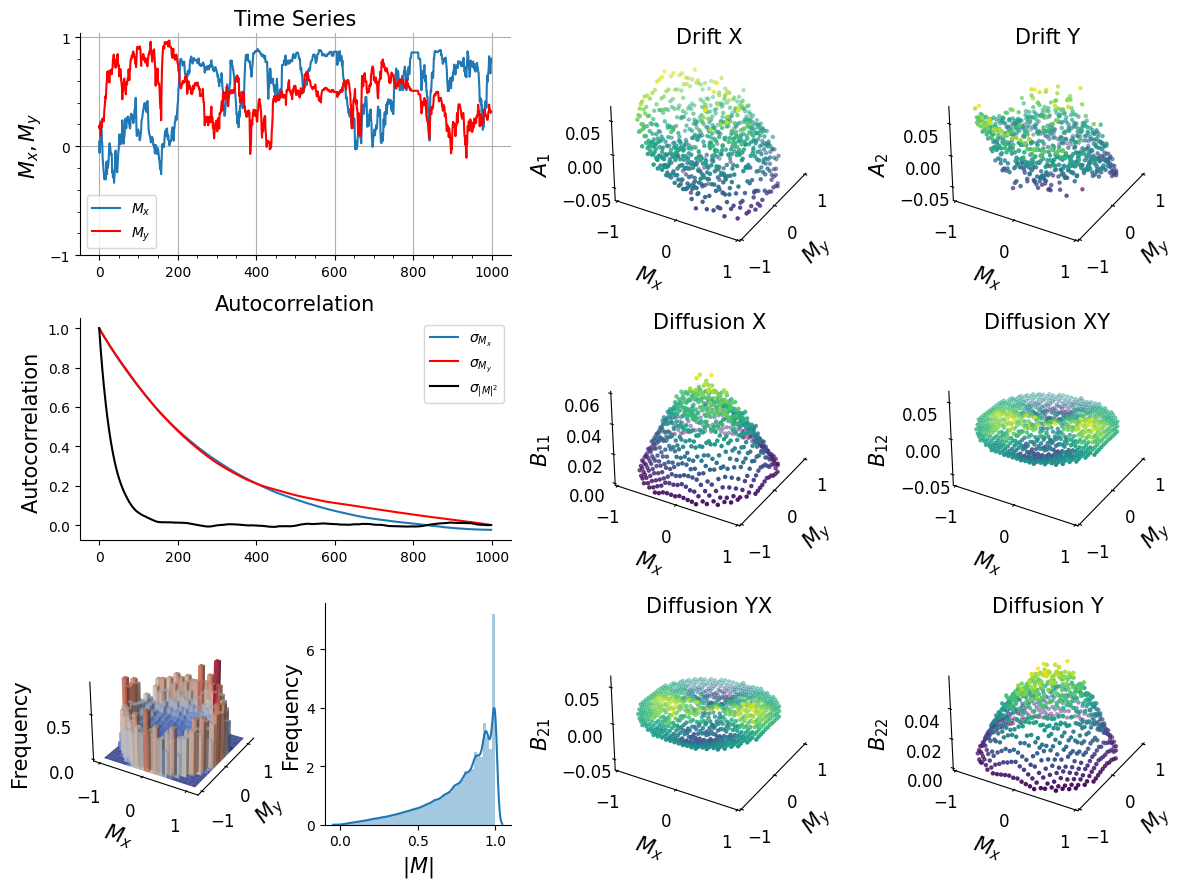

In [2]:
data, t = pydaddy.load_sample_dataset('model-data-vector-ternary')
ddsde = pydaddy.Characterize(data, t, bins=30)

## Recovering functional forms for drift and diffusion

There are 5 different functions, each of two variables: two drift functions ($A_1$ and $A_2$), two diffusion functions ($B^2_{11}$ and $B^2_{22}$) and a cross diffusion term ($B^2_{12} = B^2_{21}$). As with the 1D example, these can be fit by calling the `ddsde.fit()` function.

In [3]:
A1 = ddsde.fit('A1', order=3, tune=True)
print(A1)

(0.064 ± 0.003)x + (-0.123 ± 0.005)x^3 + (-0.119 ± 0.005)xy^2


In [4]:
A2 = ddsde.fit('A2', order=3, tune=True)
print(A2)

(0.065 ± 0.003)y + (-0.123 ± 0.006)x^2y + (-0.122 ± 0.005)y^3


In [5]:
B11 = ddsde.fit('B11', order=3, tune=True)
print(B11)

(0.050 ± 0.000) + (-0.045 ± 0.000)x^2 + (-0.050 ± 0.000)y^2


In [6]:
B22 = ddsde.fit('B22', order=3, tune=True)
print(B22)

(0.051 ± 0.000) + (-0.052 ± 0.000)x^2 + (-0.046 ± 0.000)y^2


In [7]:
B21 = ddsde.fit('B21', order=3, tune=True)
print(B21)

(0.003 ± 0.000)x^2 + (0.005 ± 0.000)xy + (-0.003 ± 0.000)y^2


The coefficients in $B_{21}$ are negligible, i.e. $B_{21}$ is effectively 0.
We can force `pydaddy` to ignore small coefficients by setting an appropriate sparity threshold manually instead of letting it automatically choose a threshold (see **FITTING NOTEBOOK** for further details).

In [8]:
B21 = ddsde.fit('B21', order=3, threshold=0.1)
print(B21)

0


## Interactive plots for drift and diffusion

As with the 1D example, we can get interactive plots of drift and diffusion functions using `ddsde.drift()` and `ddsde.diffusion()`. For 2D, there is also the `ddsde.cross_diffusion()` function to get the cross-diffusion plot.

## Diagnostics

As mentioned in the [Getting Started](./1%20-%20Getting%20Started.ipynb) notebook, `pydaddy` allows us to check if all underlying assumptions for fitting a drift-diffusion model are met. In case for 2D, the `noise_diagnostics()` functions creates the following plots:
- The distribution of the noise, along with the correlation matrix as an inset. The residual distribution should be an isotropic Gaussian distribution, and the correlation matrix should be identitity
- Autocorrelation of the components of residuals $\eta_x$, $\eta_y$, and of $|\eta| = \sqrt{\eta_x^2 + \eta_y^2}$. All of them should be uncorrelated, i.e. the autocorrelation times should be close to 0.
- QQ plots of the marginals $\eta_x$ and $\eta_y$ against theoretical Gaussian distributiona of the same mean and variance. Ideally (i.e. if the residuals are Gaussian distributed), all points of these plots should fall on a straight line of slope 1.

Noise statistics:
Mean: (-0.0163, -0.0061)
Correlation matrix:
    +1.0000    +0.0404
    +0.0404    +1.0000

Noise autocorrelation time (time-steps):
    eta_x: 0.676    eta_y: 0.676
    |eta|: 0.676


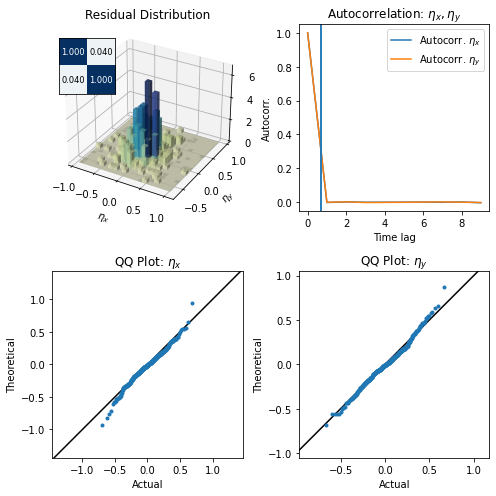

In [12]:
ddsde.noise_diagnostics()